# Hyper parameter tuning and Regularisation

## Hyper parameters

* No of layers

* No of units

* Activation function

* Loss function

* Optimizer

* Dropout rate

* Learning rate

* Epoch

* Etc..

### No of layers:

* Output layer: One

* Input Layer: One

* Hidden Layers: At least one, depends upon the problem and complexity.




### No of units:

* Output layer:

    * Regression: One

    * Binary classiifcation: One/ Two depends upon activation function

    * Multi-class classification: No of classes.

* Input layer: Depends upon the no of features/values in the data point 

* Hidden layer: Depends, generally between 10 and 100.

### Activation function

* Output layer

    * Regression: Linear

    * Binary classification: sigmoid (if the class labels are 0 and 1)

                             tanh (if the class labels are -1 and 1)

    * Multi-class classiifcation: softmax.

* Hidden layer: 'relu', in general.

### Loss function

* Regression: MAE, MSE(more preferred)

* Binary classification: BinaryCrossentropy

* Multi-class Classification: Categorical Crossentropy /
                              Sparse Categorical Crossentropy

### Optimizer

* Adam, in general

# Regularisation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Accessing the dataset

In [3]:
from tensorflow.keras.datasets import mnist

(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [4]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## Visualisation

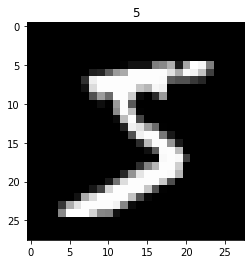

In [6]:
plt.imshow(X_train[0],'gray')
plt.title(y_train[0]);

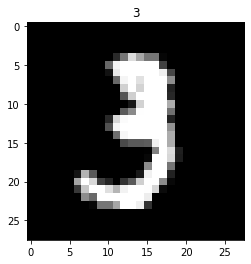

In [7]:
plt.imshow(X_train[10],'gray')
plt.title(y_train[10]);

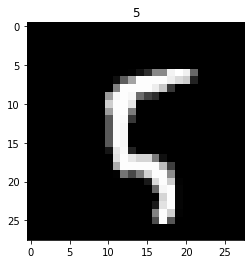

In [8]:
plt.imshow(X_train[100],'gray')
plt.title(y_train[100]);

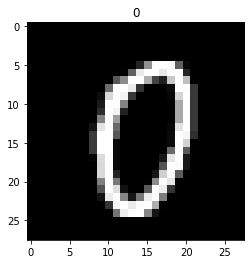

In [9]:
plt.imshow(X_train[1000],'gray')
plt.title(y_train[1000]);

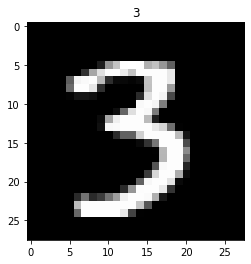

In [10]:
plt.imshow(X_train[10000],'gray')
plt.title(y_train[10000]);

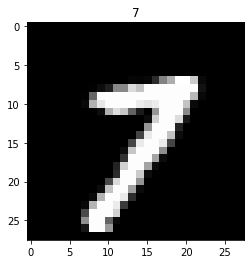

In [11]:
plt.imshow(X_train[40000],'gray')
plt.title(y_train[40000]);

In [12]:
pd.DataFrame(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

## Building a Basic Model

In [13]:
model_1=tf.keras.Sequential()
model_1.add(tf.keras.layers.Flatten())
model_1.add(tf.keras.layers.Dense(300, activation='relu'))
model_1.add(tf.keras.layers.Dense(10,activation='softmax'))

In [14]:
# compiling the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3320 - accuracy: 0.8881
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3456 - accuracy: 0.9251
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2736 - accuracy: 0.9369
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2498 - accuracy: 0.9413
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2345 - accuracy: 0.9471
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2162 - accuracy: 0.9504
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2054 - accuracy: 0.9548
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2001 - accuracy: 0.9559
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1936 - accuracy: 0.9590
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.185

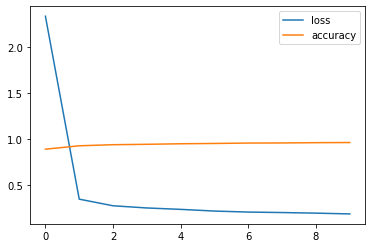

In [15]:
# Training the model

tf.random.set_seed(100)
hist_1=model_1.fit(X_train,y_train,epochs=10)
pd.DataFrame(hist_1.history).plot();

In [16]:
# Evaluation of the model

model_1.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3103 - accuracy: 0.9537


[0.31031742691993713, 0.9537000060081482]

## Comment 1:

Basic Model: Training loss=0.1852; Test loss=0.3103( Model is decent, but overfitting).

## Model with normalization

In [17]:
# Normalization

normalizer=tf.keras.layers.Normalization()
normalizer.adapt(X_train)
normalizer.adapt(X_test)

X_train=normalizer(X_train)
X_test=normalizer(X_test)

In [18]:
X_train[0]

<tf.Tensor: shape=(28, 28), dtype=float32, numpy=
array([[-3.29633080e-03, -1.03209605e-02, -2.63224952e-02,
        -5.94727769e-02, -1.16537198e-01, -1.97390229e-01,
        -2.83805698e-01, -3.79412591e-01, -4.77584034e-01,
        -5.62326729e-01, -6.23078227e-01, -6.59251928e-01,
        -6.87425375e-01, -7.26367414e-01, -7.58370578e-01,
        -7.74074256e-01, -7.61724949e-01, -7.22140551e-01,
        -6.51364148e-01, -5.54406047e-01, -4.51524764e-01,
        -3.54017019e-01, -2.68543184e-01, -1.91750199e-01,
        -1.24660455e-01, -6.43352345e-02, -2.87100654e-02,
        -8.99783615e-03],
       [-3.29633080e-03, -1.03209605e-02, -2.63224952e-02,
        -5.94727769e-02, -1.16537198e-01, -1.97390229e-01,
        -2.83805698e-01, -3.79412591e-01, -4.77584034e-01,
        -5.62326729e-01, -6.23078227e-01, -6.59251928e-01,
        -6.87425375e-01, -7.26367414e-01, -7.58370578e-01,
        -7.74074256e-01, -7.61724949e-01, -7.22140551e-01,
        -6.51364148e-01, -5.54406047e-0

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2092 - accuracy: 0.9402
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0872 - accuracy: 0.9744
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0574 - accuracy: 0.9826
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0445 - accuracy: 0.9863
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0317 - accuracy: 0.9904
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0268 - accuracy: 0.9908
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0208 - accuracy: 0.9937
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0184 - accuracy: 0.9944
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0181 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0

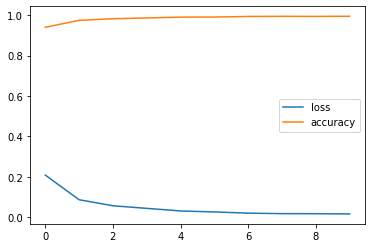

In [19]:
model_2=tf.keras.Sequential()
model_2.add(tf.keras.layers.Flatten())
model_2.add(tf.keras.layers.Dense(300, activation='relu'))
model_2.add(tf.keras.layers.Dense(10,activation='softmax'))

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Training the model
tf.random.set_seed(100)

# X_train is the normalosed training set
hist_2=model_2.fit(X_train,y_train,epochs=10)
pd.DataFrame(hist_2.history).plot();

In [20]:
model_2.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1470 - accuracy: 0.9788


[0.14703814685344696, 0.9787999987602234]

## Comment 2:

Basic Model: Training loss=0.1852; Test loss=0.3103( Model is decent, but overfitting).

Model with Normlization: Training loss=0.0170; Test loss=0.1470 ( Model improved, but overfitting still).



## Model with Cross-validation

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2303 - accuracy: 0.9348 - val_loss: 0.1338 - val_accuracy: 0.9614
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0917 - accuracy: 0.9732 - val_loss: 0.0987 - val_accuracy: 0.9742
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0593 - accuracy: 0.9829 - val_loss: 0.1035 - val_accuracy: 0.9706
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0412 - accuracy: 0.9871 - val_loss: 0.0972 - val_accuracy: 0.9753
Epoch 5/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0308 - accuracy: 0.9899 - val_loss: 0.1186 - val_accuracy: 0.9741
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0237 - accuracy: 0.9928 - val_loss: 0.1221 - val_accuracy: 0.9731
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0195 - accuracy: 0.9936 - val_loss: 0.1124 - val_accuracy

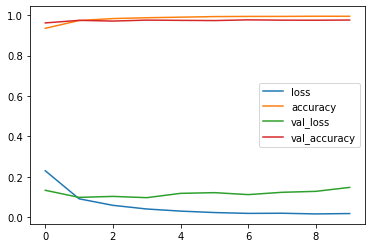

In [21]:
model_3=tf.keras.Sequential()
model_3.add(tf.keras.layers.Flatten())
model_3.add(tf.keras.layers.Dense(300, activation='relu'))
model_3.add(tf.keras.layers.Dense(10,activation='softmax'))

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Training the model
tf.random.set_seed(100)

# validation_split
hist_3=model_3.fit(X_train,y_train,epochs=10,validation_split=0.2)
pd.DataFrame(hist_3.history).plot();

In [22]:
model_3.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.1403 - accuracy: 0.9762


[0.14034612476825714, 0.9761999845504761]

## Comment 3:

Basic Model: Training loss=0.1852; Test loss=0.3103( Model is decent, but overfitting).

Model with Normlization: Training loss=0.0170; Test loss=0. 1470 ( Model improved, but overfitting still).


Model with Cross-validation: Trainig loss: 0.0187; Test loss=0.1403 ( Model has improved, but epoch needs to curtailed to reduce overfitting).



## Early stopping